# EDA Case Study: “Analyzing Cafe Sales Data”

1.Importing relevant libraries & reading the dataset.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df=pd.read_csv('/content/_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


2. Exploring data

In [14]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


In [15]:
print("\nValue count in data")
for col in df:
  print(f"\nValue count in {col}")
  print(df[col].value_counts())
  print("----------------------------------------------------------")



Value count in data

Value count in Transaction ID
Transaction ID
TXN_9226047    1
TXN_8567525    1
TXN_4583012    1
TXN_6796890    1
TXN_9933628    1
              ..
TXN_3160411    1
TXN_7034554    1
TXN_4271903    1
TXN_4977031    1
TXN_1961373    1
Name: count, Length: 10000, dtype: int64
----------------------------------------------------------

Value count in Item
Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64
----------------------------------------------------------

Value count in Quantity
Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64
----------------------------------------------------------

Value count in Price Per Unit
Price Per Unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5     

3. Correcting Data types:

In [16]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

In [26]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').astype('Int64')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce').astype('float')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce').astype('float')

**Data Cleaning**

* Identify Missing Values

* Detect Missing values
* Decide on strategies: drop or impute missing values.




In [17]:
df.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,460


In [18]:
missing_value_percentage=(df.isnull().sum()/len(df))*100
print(missing_value_percentage)

Transaction ID       0.00
Item                 3.33
Quantity             1.38
Price Per Unit       1.79
Total Spent          1.73
Payment Method      25.79
Location            32.65
Transaction Date     4.60
dtype: float64


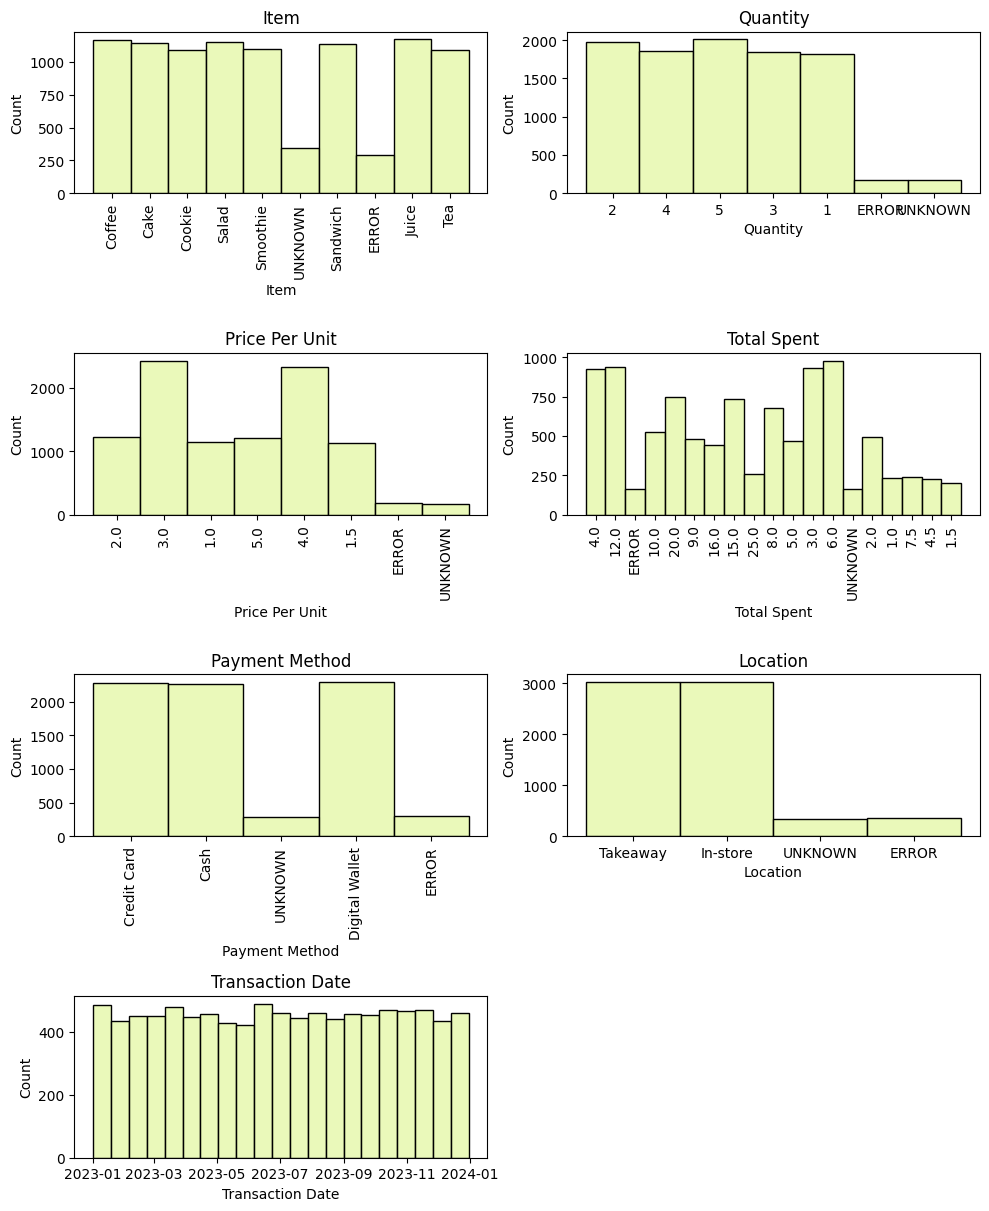

In [21]:
plt.figure(figsize=(10,15))


plt.subplot(5,2,1)
sns.histplot(df["Item"],color="#E4F8A3",edgecolor="black")
plt.title("Item")
plt.xticks(rotation=90)

plt.subplot(5,2,2)
sns.histplot(df["Quantity"],color="#E4F8A3",edgecolor="black")
plt.title("Quantity")

plt.subplot(5,2,3)
sns.histplot(df["Price Per Unit"],color="#E4F8A3",edgecolor="black")
plt.title("Price Per Unit")
plt.xticks(rotation=90)

plt.subplot(5,2,4)
sns.histplot(df["Total Spent"],color="#E4F8A3",edgecolor="black")
plt.title("Total Spent")
plt.xticks(rotation=90)

plt.subplot(5,2,5)
sns.histplot(df["Payment Method"],color="#E4F8A3",edgecolor="black")
plt.title("Payment Method")
plt.xticks(rotation=90)

plt.subplot(5,2,6)
sns.histplot(df["Location"],color="#E4F8A3",edgecolor="black")
plt.title("Location")

plt.subplot(5,2,7)
sns.histplot(df["Transaction Date"],color="#E4F8A3",edgecolor="black")
plt.title("Transaction Date")

plt.tight_layout()
plt.show()

In [24]:
# Dealing with categorical columns first
#filled missing values with "Unknown" in Item and Payment column to maintain integrity of data.
#dropped location column since it is not relevant in further analysis


df['Item']=df['Item'].fillna("Unknown")
df['Payment Method']=df['Payment Method'].fillna("Unknown")

df = df.drop('Location', axis=1)


In [27]:
## Dealing with numerical columns
# used forward fill in transaction date
#replaced missing values of Quanity and Price per unit with their respective means
# refilled total spent column with newly calculated values of total sales

df['Transaction Date'] = df['Transaction Date'].fillna(method='ffill')
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].median())
df['Total Spent'] = df['Quantity'] * df['Price Per Unit']

<ipython-input-27-0a7dbf7ed99f>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Transaction Date'] = df['Transaction Date'].fillna(method='ffill')


In [28]:
df.isnull().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Transaction Date,0


**Standardize Data Formats:**


Ensure consistency in categorical variables (e.g., product names, categories).


Convert date columns to datetime objects.




In [ ]:
df['Item']=df['Item'].replace('UNKNOWN','Unknown')
df['Payment Method']=df['Item'].replace('UNKNOWN','Unknown')

In [ ]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')

 **Outlier Detection**
Detect Outliers:


Use statistical methods like Z-score or IQR to find anomalies in sales amounts or quantities.


Treat Outliers:


Decide whether to cap, transform, or remove outliers based on their impact.




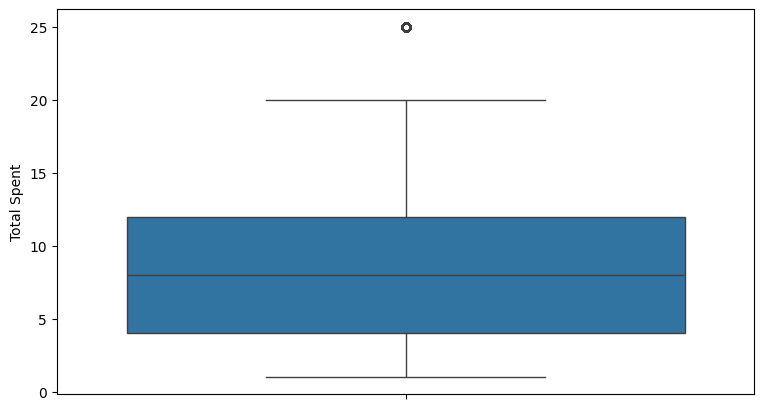

In [30]:
plt.figure(figsize=(9,5))
sns.boxplot(df['Total Spent'])
plt.show()

In [ ]:
Q1=df['Total Spent'].quantile(0.25)
Q3=df['Total Spent'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

df=df[(df['Total Spent']>=lower_bound) & (df['Total Spent']<=upper_bound)]
#capped outliers with lower and upper bund values
df['Total Spent'] = np.where(
    df['Total Spent'] < lower_bound, lower_bound,
    np.where(df['Total Spent'] > upper_bound, upper_bound, df['Total Spent'])
)


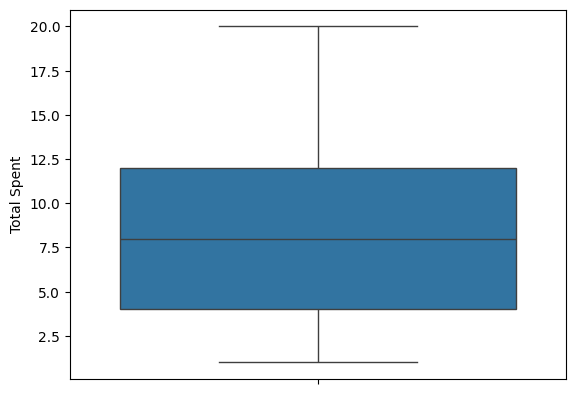

In [33]:
sns.boxplot(df['Total Spent'])
plt.show()

**Data Visualization**
Sales Trends:


Line plots showing sales over time.


Bar charts for sales by product category.


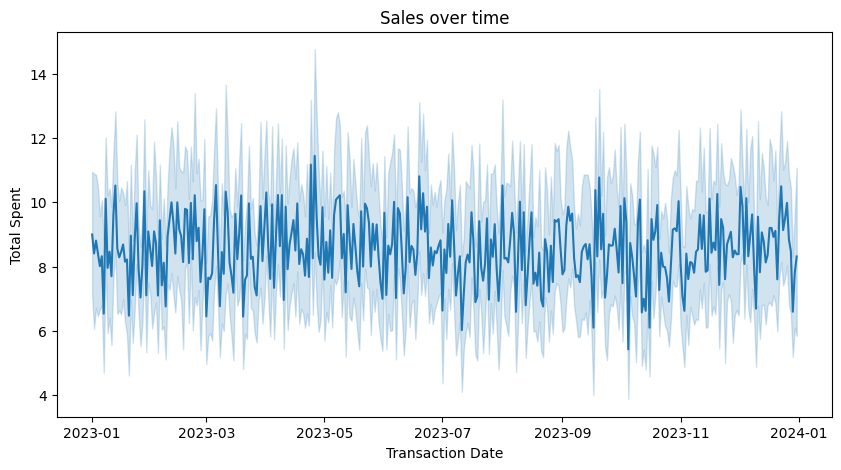

In [34]:
#line plot

plt.figure(figsize=(10, 5))
sns.lineplot(x='Transaction Date', y='Total Spent', data=df)
plt.title('Sales over time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Spent')
plt.show()


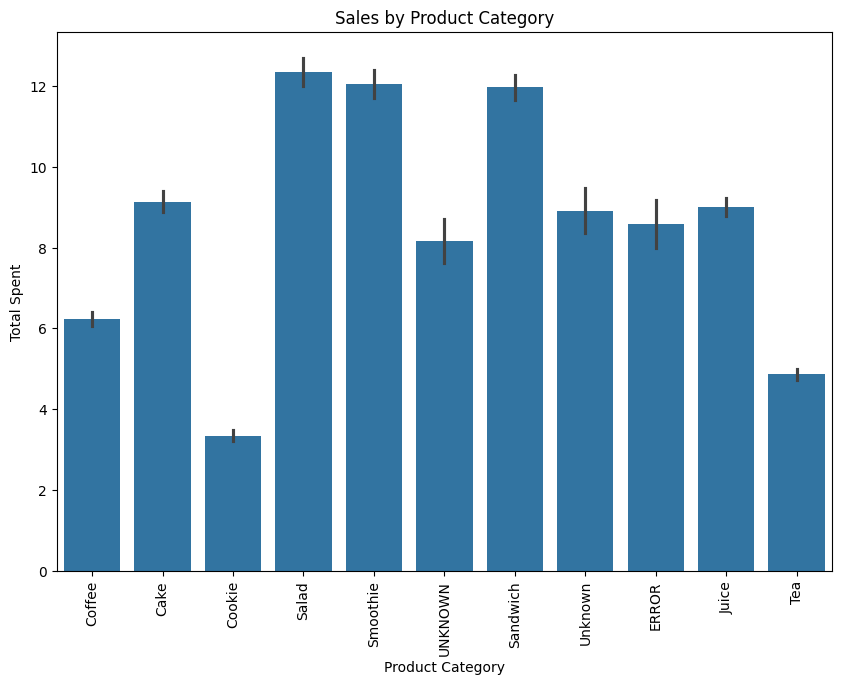

In [35]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Item', y='Total Spent', data=df)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spent')
plt.xticks(rotation=90)
plt.show()



**Customer Behavior:**


Pie charts depicting purchase distribution among customer segments.


Heatmaps to identify peak sales hours or days.




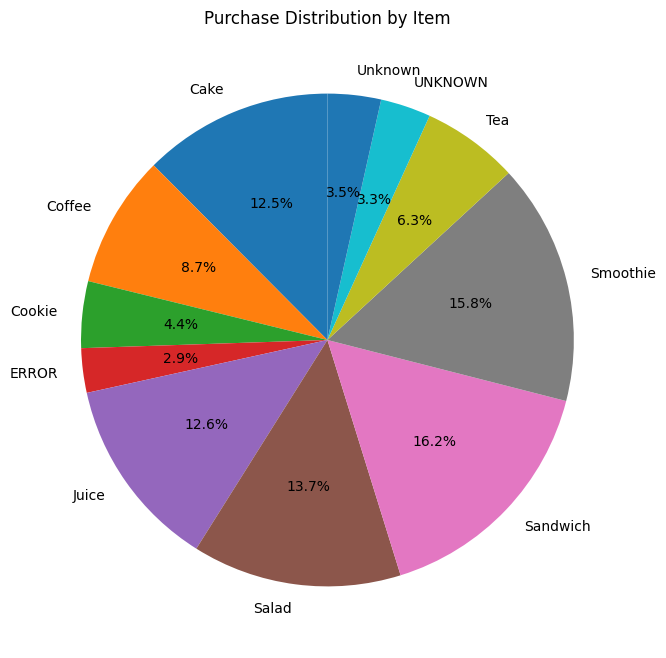

In [36]:
payment_method_sales = df.groupby('Payment Method')['Total Spent'].sum()
item_sales = df.groupby('Item')['Total Spent'].sum()

plt.figure(figsize=(8, 8))
plt.pie(item_sales, labels=item_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Distribution by Item')
plt.show()



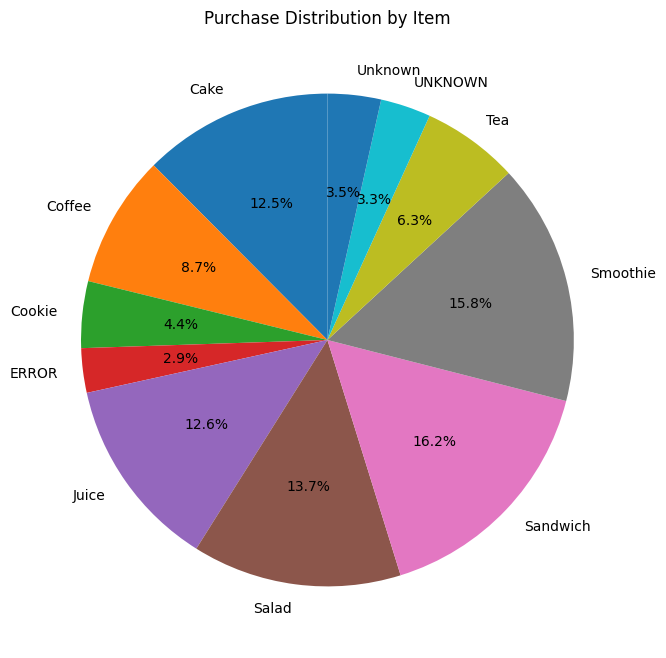

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(item_sales, labels=item_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Purchase Distribution by Item')
plt.show()

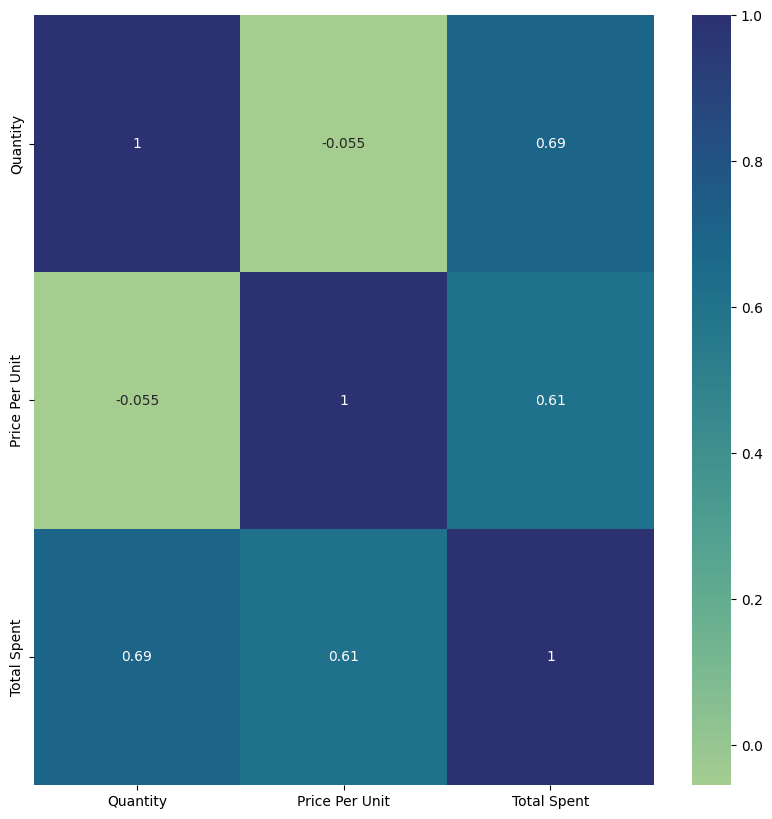

In [38]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap="crest")
plt.show()


Feature Engineering (30 mins) Create New Features:

Derive 'Total Sale' by multiplying quantity and unit price.

Extract 'Day of Week' and 'Hour' from timestamp for temporal analysis.



In [39]:
df["Total_Sale"]=df['Price Per Unit']*df["Quantity"]
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Transaction Date,Total_Sale
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,2023-09-08,4.0
1,TXN_4977031,Cake,4,3.0,12.0,Cash,2023-05-16,12.0
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,2023-07-19,4.0
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,2023-04-27,10.0
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,2023-06-11,4.0


In [40]:
df['day_of_week']=df['Transaction Date'].dt.day_name()
df['hour']=df['Transaction Date'].dt.hour

#hours can't be extracted ,since time is not given

In [41]:
categorical_cols = ["Item", "Payment Method"]


df_encoded = pd.get_dummies(df, columns=categorical_cols)


print(df_encoded)

     Transaction ID  Quantity  Price Per Unit  Total Spent Transaction Date  \
0       TXN_1961373         2             2.0          4.0       2023-09-08   
1       TXN_4977031         4             3.0         12.0       2023-05-16   
2       TXN_4271903         4             1.0          4.0       2023-07-19   
3       TXN_7034554         2             5.0         10.0       2023-04-27   
4       TXN_3160411         2             2.0          4.0       2023-06-11   
...             ...       ...             ...          ...              ...   
9995    TXN_7672686         2             2.0          4.0       2023-08-30   
9996    TXN_9659401         3             3.0          9.0       2023-06-02   
9997    TXN_5255387         4             2.0          8.0       2023-03-02   
9998    TXN_7695629         3             3.0          9.0       2023-12-02   
9999    TXN_6170729         3             4.0         12.0       2023-11-07   

      Total_Sale day_of_week  hour  Item_Cake  Item